In [1]:
import SIRD_Model

import platform

if platform.system() == "Windows":
    pathc="..\\Data\\Italian Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Italian Data/"
    
filename = "National Data.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

### Example on Italian Dataset

1. Find Q
2. Graph parameter curves (basis functions)
3. Graph SIRD
4. Graph parameter curves (time based, raw)

q:  0.007811913777777778



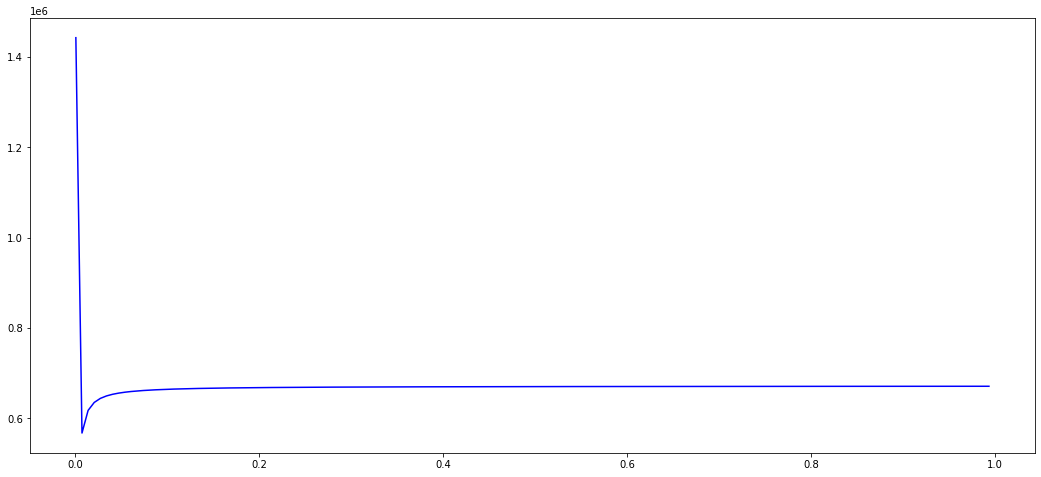

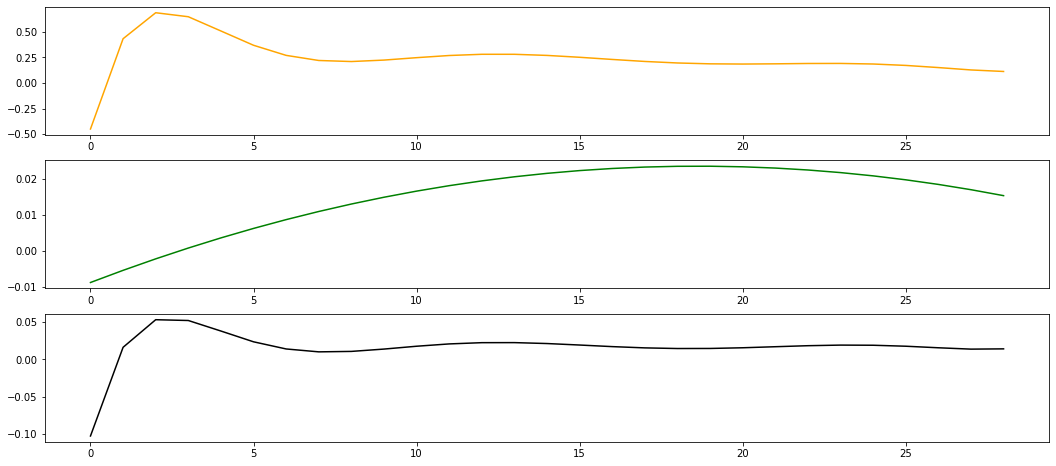

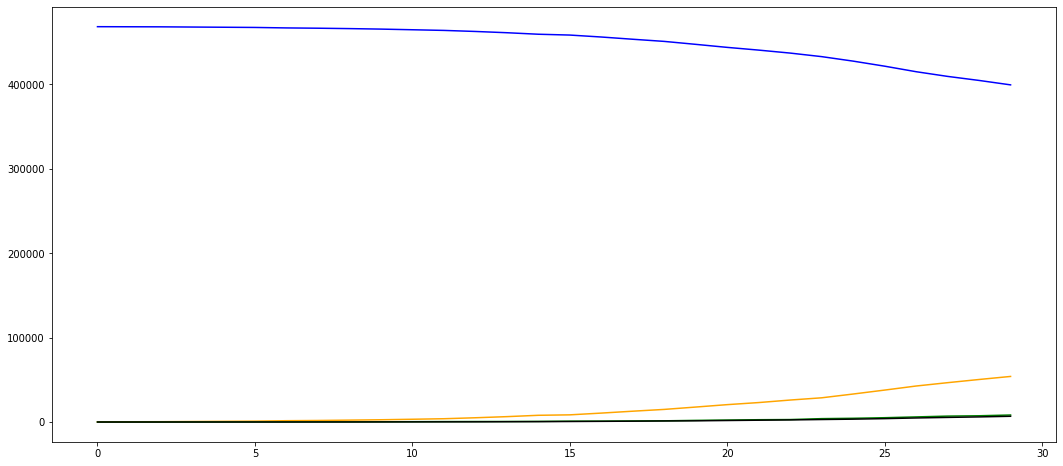

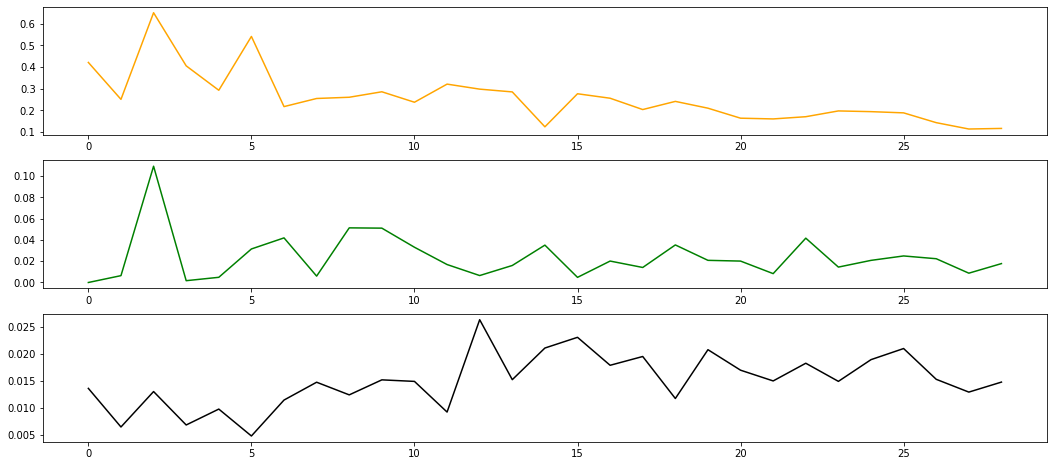

In [2]:
pop = 60000000
numDays = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]

#q = SIRD_Model.getQBasis(infect, recov, dead, pop, qMax=1)
#print("q: ", q)
q, params = SIRD_Model.getQ(infect, recov, dead, pop, qMax=1)
print("q: ", q)
#q=.011
suscept = q*pop - infect - recov - dead
SIRD_Model.getBasisFunc(suscept, infect, recov, dead)
SIRD_Model.calculateAverageParams(infect, recov, dead, pop, q)
print()

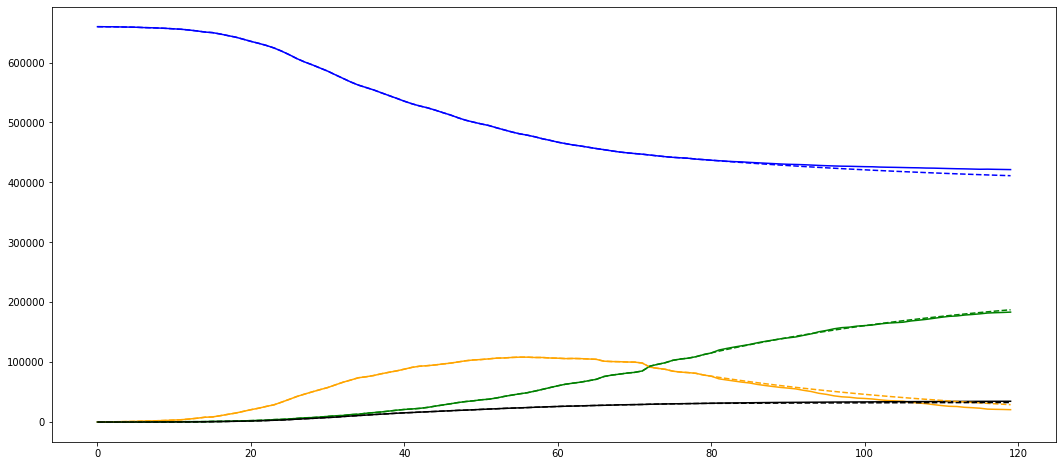

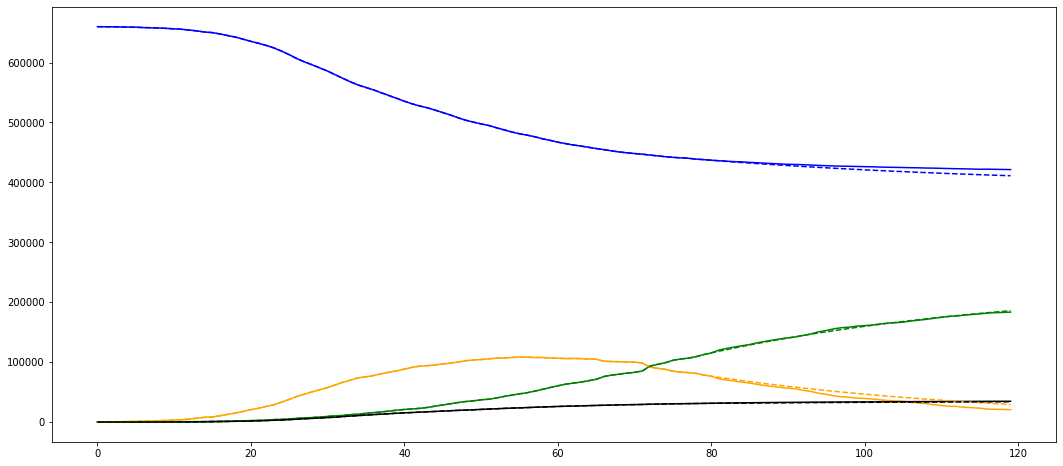

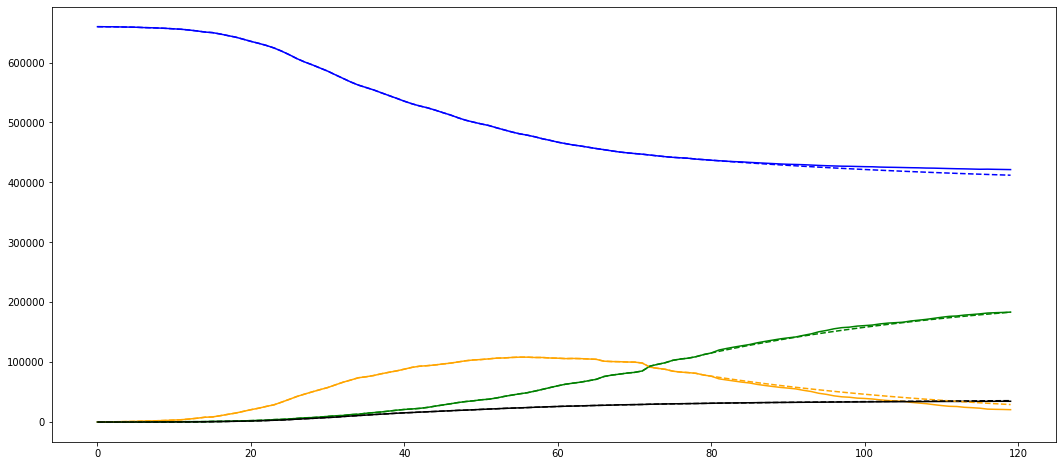

In [8]:
#demonstrate different prediction methods
#predict from the paper last 40 days after the first 120
pop = 60000000
numDays = 120
daysToPredict = 40
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]

#q=None #use this to have function automatically calculte q
q=.011 #manually set q
SIRD_Model.predictMatchBasis(infect, recov, dead, pop, daysToPredict, qVal=q, smooth=False) #print with smoothing method
SIRD_Model.predictMatchBasis(infect, recov, dead, pop, daysToPredict, qVal=q, smooth=True) #print with smoothing method
SIRD_Model.predictMatch(infect, recov, dead, pop, daysToPredict, qVal=q)

### Example on US Dataset

1. Find Q
2. Graph parameter curves (basis functions)
3. Graph SIRD
4. Graph parameter curves (time based, raw)

In [14]:
if platform.system() == "Windows":
    pathc="..\\Data\\Covid Tracking State Data\\"
elif platform.system() == "Linux":
    pathc="../Data/Covid Tracking State Data/"
    
filename = "AR.csv"

dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

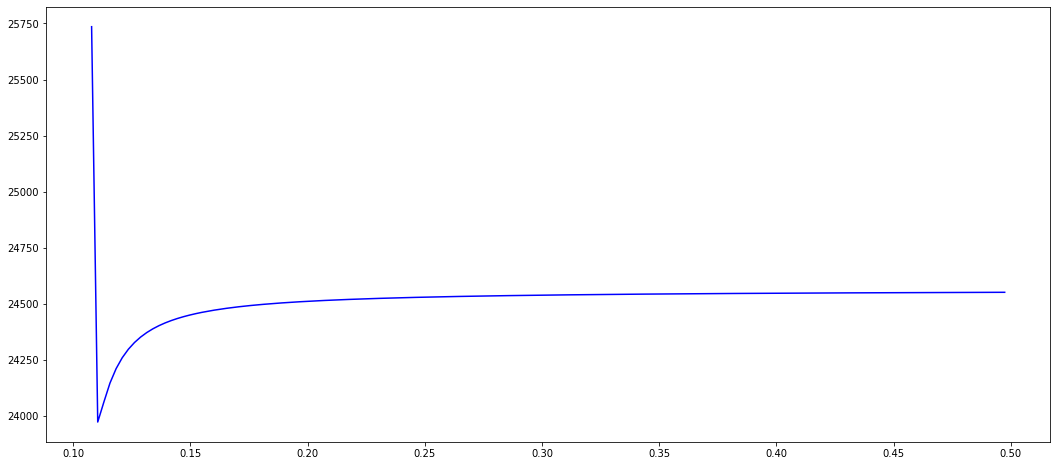

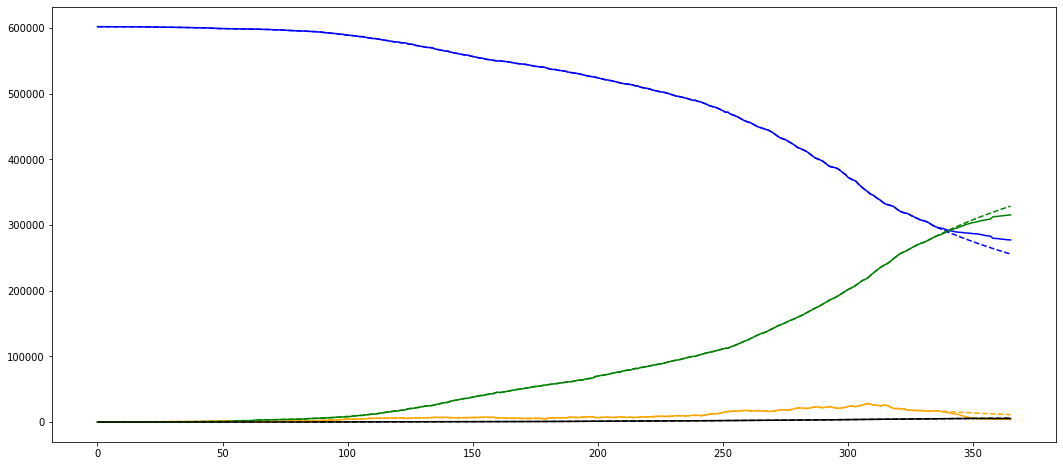

In [16]:
pop = 3011000
numDays = 400
daysToPredict = 30
infect = infectRaw[0:numDays]
recov = recovRaw[0:numDays]
dead = deadRaw[0:numDays]
infect = infect - recov - dead
#q=None #use this to have function automatically calculte q
q = SIRD_Model.getQBasis(infect, recov, dead, pop, qMax=.5)
q=.2
SIRD_Model.predictMatchBasis(infect, recov, dead, pop, daysToPredict, qVal = q, smooth=False) #print with smoothing method